# pattern recognition assignment 5 

sajjad pakdaman savoji

810195517

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

split train and test 

In [2]:
csv_name = 'retailMarketing.csv'
data = pd.read_csv(csv_name)
data = data.drop("Unnamed: 0" , axis = 1)
labels = data.Age
features = data.drop("Age" , axis = 1)

In [3]:
train_f, test_f, train_l, test_l = train_test_split(features , labels , test_size = 0.1)

train svm in the train dataset

In [22]:
clf = svm.SVC(C=1)
clf.fit(train_f , train_l)

/home/savoji/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

train accuracy

In [23]:
pred = clf.predict(train_f)
accuracy_score(pred , train_l)

1.0

test accuracy

In [24]:
pred = clf.predict(test_f)
accuracy_score(pred , test_l)

0.42

which means that clf is over fitting

In [35]:
clf = svm.LinearSVC(C=0.1)
clf.fit(train_f , train_l)

/home/savoji/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [36]:
pred = clf.predict(train_f)
accuracy_score(pred , train_l)

0.3877777777777778

In [37]:
pred = clf.predict(test_f)
accuracy_score(pred , test_l)

0.31

this model is not overfitting but the data is not linearly seprable

let's check out the effect of normalization in dataframe

In [38]:
from sklearn import preprocessing

In [41]:
normalizer = preprocessing.MinMaxScaler()
train_scaled_f = normalizer.fit_transform(train_f)
test_scaled_f  = normalizer.fit_transform(test_f)

In [46]:
clf = svm.SVC(C=1)
clf.fit(train_scaled_f , train_l)

/home/savoji/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

train accuracy

In [47]:
pred = clf.predict(train_scaled_f)
accuracy_score(pred , train_l)

0.6655555555555556

test accuracy

In [48]:
pred = clf.predict(test_scaled_f)
accuracy_score(pred , test_l)

0.6

normalization helped overfiting

In [49]:
clf = svm.LinearSVC(C=0.1)
clf.fit(train_scaled_f , train_l)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [50]:
pred = clf.predict(train_scaled_f)
accuracy_score(pred , train_l)

0.7522222222222222

In [51]:
pred = clf.predict(test_scaled_f)
accuracy_score(pred , test_l)

0.72

normalization also helped generalization of linear structured classifier

# fine tune params 

In [58]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid_params = {'C':np.arange(287.5 ,288.5, 0.01),
               'gamma':np.arange(0.25, 0.24 , -0.001)}
grid = GridSearchCV(svm.SVC() , grid_params)

In [90]:
grid.fit(train_scaled_f , train_l)

/home/savoji/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([287.5 , 287.51, 287.52, 28...
       288.22, 288.23, 288.24, 288.25, 288.26, 288.27, 288.28, 288.29,
       288.3 , 288.31, 288.32, 288.33, 288.34, 288.35, 288.36, 288.37,
       288.38, 288.39, 288.4 , 288.41, 288.42, 288.43, 288.44, 288.45,
       288.46, 288.47, 288.48, 288.49]),
                         'gamma': array([0.25 , 0.249, 0.248, 0.247, 0.246, 0.245, 0.244, 0.243, 0.242,
       0.241, 0.24 ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [91]:
grid.best_params_

{'C': 287.5, 'gamma': 0.25}

In [92]:
pred = grid.predict(train_scaled_f)
accuracy_score(pred , train_l)

0.9455555555555556

In [93]:
pred = grid.predict(test_scaled_f)
accuracy_score(pred , test_l)

0.77

plot results

In [94]:
from sklearn.model_selection import GridSearchCV

In [131]:
grid_params = {'C':np.arange(10 ,400, 20),
               'gamma':np.arange(0.01, 3 , 0.01)}
grid = GridSearchCV(svm.SVC() , grid_params , return_train_score=True , refit=True)

In [132]:
res = grid.fit(train_scaled_f , train_l)

/home/savoji/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [133]:
res = pd.DataFrame(grid.cv_results_)[["param_C" , "param_gamma" , "mean_test_score"]]

In [134]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'grid search')

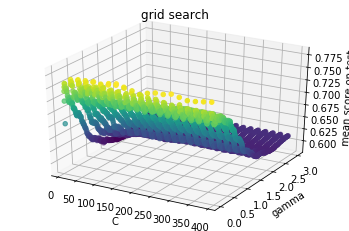

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(res.param_C , res.param_gamma , res.mean_test_score , c =res.mean_test_score )
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('mean score on test')
ax.set_title('grid search')
